In [ ]:
# PIL  (Pillow) is a Python Imaging Library for working with images

# ! pip install Pillow


In [12]:
from pyspark.sql import SparkSession
import numpy as np
from PIL import Image
import io               #io module for working with various input/output streams
import matplotlib.pyplot as plt

 

In [16]:
#creat a spark session
spark = SparkSession.builder.appName("LoadImageFromHadoop").getOrCreate()


In [75]:
data_path = "hdfs:///user1/images/*.jpeg"

image_df = spark.read.format("binaryFile").load(data_path)



In [79]:
image_df.show(truncate = 40)

+----------------------------------------+-----------------------+------+----------------------------------------+
|                                    path|       modificationTime|length|                                 content|
+----------------------------------------+-----------------------+------+----------------------------------------+
|hdfs://localhost:9000/user1/images/le...|2024-04-19 20:57:32.915|455601|[FF D8 FF E1 1D F8 45 78 69 66 00 00 ...|
|hdfs://localhost:9000/user1/images/df...|2024-04-19 20:57:05.125| 10879|[FF D8 FF E0 00 10 4A 46 49 46 00 01 ...|
|hdfs://localhost:9000/user1/images/df...|2024-04-19 20:57:05.169|  9866|[FF D8 FF E0 00 10 4A 46 49 46 00 01 ...|
|hdfs://localhost:9000/user1/images/do...|2024-04-19 20:57:05.603|  9523|[FF D8 FF E0 00 10 4A 46 49 46 00 01 ...|
|hdfs://localhost:9000/user1/images/im...|2024-04-19 18:44:37.597|  9329|[FF D8 FF E0 00 10 4A 46 49 46 00 01 ...|
+----------------------------------------+-----------------------+------+-------

In [1]:
# Function image_to_array will convert the binary 
# content for spark rdd  into a np array.  
# it returns the array
def image_to_array(row):
    content = row['content']
    img = Image.open(io.BytesIO(content))
    img_rgb = img.convert('RGB')
    return np.array(img_rgb) 
   

In [81]:
 
# Convert each row of the DataFrame to RGB array
rgb_arrays_rdd = image_df.rdd.map(image_to_array)

# Collect the RGB arrays into a list
rgb_arrays = rgb_arrays_rdd.collect()

rgb_arrays

[array([[[119, 161,  53],
         [122, 161,  54],
         [120, 159,  52],
         ...,
         [108, 155,  83],
         [106, 158,  83],
         [105, 153,  77]],
 
        [[117, 160,  55],
         [119, 159,  60],
         [121, 159,  50],
         ...,
         [105, 153,  77],
         [102, 156,  68],
         [101, 151,  62]],
 
        [[119, 157,  54],
         [118, 160,  60],
         [119, 158,  49],
         ...,
         [ 96, 146,  59],
         [ 94, 150,  59],
         [ 88, 150,  65]],
 
        ...,
 
        [[ 86, 125,  42],
         [ 82, 121,  40],
         [ 75, 116,  37],
         ...,
         [ 51,  84,  29],
         [ 46,  84,  27],
         [ 47,  78,  21]],
 
        [[ 80, 119,  38],
         [ 74, 115,  36],
         [ 69, 112,  33],
         ...,
         [ 52,  85,  30],
         [ 49,  84,  28],
         [ 48,  79,  22]],
 
        [[ 75, 114,  33],
         [ 68, 111,  31],
         [ 64, 108,  29],
         ...,
         [ 50,  85,  29],
  

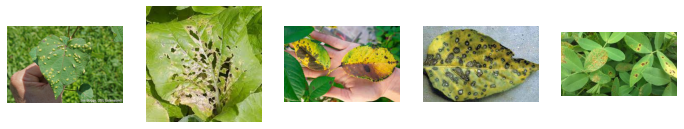

In [99]:
# Loop through each RGB array and plot it as an image

fig, axes = plt.subplots(1,5, figsize=(12,4))
i = 0
for  rgb_array in rgb_arrays:
    axes[i].imshow(rgb_array)
    axes[i].axis('off')
    i +=1

plt.show()